In [680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from astropy.io import fits
import astropy.wcs as wcs

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.votable import from_table, writeto

# Make .xml files of regions

In [679]:
yso_files = {'IR (Ohlendorf et al. 2013)': pd.read_csv('Preibisch_IR_sources_wise_radec.csv'),
             'X-RAY (Preibisch et al. 2014)': Table(fits.open('J_A+A_564_A120_table1.dat.fits')[1].data).to_pandas(),
             'Outflows (Reiter et al. 2022)': pd.read_csv('Reiter2022_cYSOs.csv'),
             'SPICY (Kuhn et al. 2021)': pd.read_csv('../Archive/SPICY_YSO_SubClasses.csv',comment='#')}

yso_files['X-RAY (Preibisch et al. 2014)'].columns = ['Seq', 'Name', 'RA', 'DEC', 'ePos', 'theta', 'Ctnet', 'e_Ctnet',
       'Bt', 'CHnet', 'fPSF', 'Signi', 'l_logPB', 'logPB', 'f_Seq', 'Var',
       'Emed']

sp_sky = SkyCoord(yso_files['SPICY (Kuhn et al. 2021)']['     RAdeg      DEdeg'].to_numpy(),unit=u.deg)
yso_files['SPICY (Kuhn et al. 2021)']['RA'] = sp_sky.ra/u.deg
yso_files['SPICY (Kuhn et al. 2021)']['DEC'] = sp_sky.dec/u.deg


In [681]:


yso_all = pd.DataFrame(data={'RA':[np.nan],'DEC':[np.nan],'Survey':[np.nan]})
# yso_all['Survey'] = ['Ohlendorf IR 2013']* len(yso_files['IR'])
# yso_all.append(yso_files['X-RAY'][['RA','DEC']])

for survey in yso_files:
    print(survey)
    tmp_df = yso_files[survey][['RA','DEC']].copy()
    tmp_df['Survey'] = [survey] * len(tmp_df)
    # tmp_df.to_csv(f'YSOs_RADEC{survey}.csv')
    tmp_votab = from_table(Table.from_pandas(tmp_df,units={'RA':u.deg,'DEC':u.deg}))
    writeto(tmp_votab, f"YSOs_{survey}.xml")

    yso_all = pd.concat([yso_all,tmp_df], ignore_index=True)
yso_all.dropna(inplace=True)
yso_all.to_csv('All_YSOs_RADEC.csv')

yso_all_votab = from_table(Table.from_pandas(yso_all,units={'RA':u.deg,'DEC':u.deg}))
writeto(yso_all_votab, "YSOs_prev_works.xml")

IR (Ohlendorf et al. 2013)
X-RAY (Preibisch et al. 2014)
Outflows (Reiter et al. 2022)
SPICY (Kuhn et al. 2021)
          RA        DEC                      Survey
1  159.72722 -58.971965  IR (Ohlendorf et al. 2013)
2  160.34684 -58.916061  IR (Ohlendorf et al. 2013)
3  160.26972 -58.846619  IR (Ohlendorf et al. 2013)
4  160.28245 -58.840355  IR (Ohlendorf et al. 2013)
5  160.27200 -58.835846  IR (Ohlendorf et al. 2013)


# Regions to .als

In [ ]:
import pyregion

def regions_to_als(filt):
    points = pyregion.open(f"/Users/breannacrompvoets/DAOPHOT/daophot4/{filt}_points.ds9")
    coords = points[0].coord_list
    x = [coords[i] for i in np.arange(0,len(coords),2)]
    y = [coords[i+1] for i in np.arange(0,len(coords),2)]
    
    f = open(f"/Users/breannacrompvoets/DAOPHOT/daophot4/{filt}_points.als",'w')
    f.write(" NL    NX    NY  LOWBAD HIGHBAD  THRESH     AP1  PH/ADU  RNOISE    FRAD\n 1 14215  8421   -54.3  5000.0  47.060   1.500  10.000   9.150   3.000\n \n")
    for i in range(0,len(x)):
        f.write(f"900000{i} {x[i]}  {y[i]}  10  0   0   1   0   0 \n")
    f.close()
    return f"{filt} is saved as als"

In [ ]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
for f in filters:
    regions_to_als(f)

# Check .lst files for dubious detections - located in manual_check_image.py


In [682]:
filt = 'f200w'
os.replace('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/Webb_PRF_Classification/temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.nei")

In [572]:
print(dao_l.x.iloc[i],dao_l.y.iloc[i])

dao_l

13149.0 595.0


,ID,x,y,Mag,Col1,Col2
0,14425,6490.00,5175.00,9.580,0.023,NaN
1,26555,5219.00,7417.00,9.649,0.023,NaN
2,14330,6418.00,5150.00,9.744,0.046,NaN
3,2022,13149.00,595.00,9.832,0.027,NaN
4,5258,3062.59,1603.00,9.843,0.038,NaN
...,...,...,...,...,...,...
1595,32350,10306.58,8330.64,12.655,0.005,NaN
1596,8445,585.14,2714.17,12.655,0.009,NaN
1597,1945,12980.10,569.00,12.655,0.190,NaN
1598,269,61.19,124.30,12.656,0.012,NaN


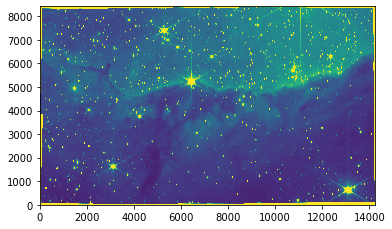

In [571]:
filt = 'f090w'
cols_lst = ['ID','x','y','Mag','Col1','Col2']
dao_l = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.lst", header=None,delim_whitespace=True, skiprows=3, names=cols_lst)
# i +=1
hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.fits")
m = np.mean(hdu[0].data)
s = np.std(hdu[0].data)
plt.imshow(hdu[0].data,vmax=1200,origin='lower')
# plt.plot(dao_l.x.iloc[i],dao_l.y.iloc[i],'s',color='red',alpha=0.5)
# plt.xlim(dao_l.x.iloc[i]-p_s,dao_l.x.iloc[i]+p_s)
# plt.ylim(dao_l.y.iloc[i]-p_s,dao_l.y.iloc[i]+p_s)
# plt.show(block=False)
# plt.pause(2)
# plt.close()

# Review .raw files/colours

8756


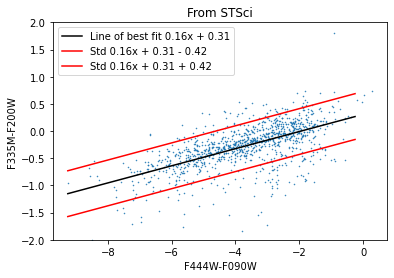

In [5]:
jwst = pd.read_csv("CC_Catalog_May112023.csv")
print(len(jwst))
jwst_pl = jwst.dropna(subset=['isophotal_vegamag_f090w','isophotal_vegamag_f200w','isophotal_vegamag_f335m','isophotal_vegamag_f444w'])
col_x_j = jwst_pl.isophotal_vegamag_f444w-jwst_pl.isophotal_vegamag_f090w
col_y_j = jwst_pl.isophotal_vegamag_f335m-jwst_pl.isophotal_vegamag_f200w

lin_fit = np.polyfit(col_x_j, col_y_j, 1)

xlim = np.arange(min(col_x_j),max(col_x_j),1)
plt.plot(col_x_j, col_y_j,'.',markersize=1)
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1], 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] - np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} - {np.std(col_y_j):4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} + {np.std(col_y_j):4.2f}')
# plt.plot(jwst.isophotal_vegamag_f200w-jwst.isophotal_vegamag_f090w, jwst.isophotal_vegamag_f444w-jwst.isophotal_vegamag_f335m,'.')
plt.xlabel('F444W-F090W')
plt.ylabel('F335M-F200W')

plt.ylim(-2,2)
plt.title('From STSci')
plt.legend()
plt.savefig('./Figures/DAOPHOT_Comp_StSci_2.png',dpi=300)

In [6]:
head = ['Index','x','y','f200w','e_f200w','f090w','e_f090w','f187n','e_f187n','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
dao = pd.read_csv("~/DAOPHOT/daophot4/ngc3324_for_py.raw", header=None,delim_whitespace=True, comment='#',names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao

,x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,84.624,6063.185,14.9200,0.2020,99.9999,9.9999,99.9999,9.9999,15.5420,0.1593,15.8890,0.2234,99.9999,9.9999
2.0,89.420,6051.155,99.9999,9.9999,99.9999,9.9999,17.2240,0.0993,99.9999,9.9999,17.1460,0.1418,17.5380,0.0806
3.0,90.610,6063.732,16.4510,0.1996,99.9999,9.9999,17.1880,0.1252,99.9999,9.9999,99.9999,9.9999,16.0120,0.1297
4.0,91.523,4237.692,16.3600,0.0800,18.2830,0.0507,99.9999,9.9999,18.2890,0.0341,18.6570,0.0183,99.9999,9.9999
5.0,101.683,6064.138,99.9999,9.9999,99.9999,9.9999,14.2510,0.2260,99.9999,9.9999,17.5010,0.1499,17.4590,0.1216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440.0,14369.210,1588.765,17.1260,0.0344,99.9999,9.9999,18.2960,0.0944,18.8860,0.0339,19.2540,0.0234,99.9999,9.9999
4441.0,14380.240,1923.570,15.6460,0.0462,18.6260,0.0981,18.4820,0.2517,17.6810,0.0166,18.0520,0.0203,18.1290,0.0189
4442.0,14386.700,691.272,16.6220,0.0637,99.9999,9.9999,17.4660,0.0813,18.3980,0.0297,18.6500,0.0182,18.7350,0.0303


In [7]:
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

,x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,84.624,6063.185,14.920,0.2020,NaN,NaN,NaN,NaN,15.542,0.1593,15.889,0.2234,NaN,NaN
2.0,89.420,6051.155,NaN,NaN,NaN,NaN,17.224,0.0993,NaN,NaN,17.146,0.1418,17.538,0.0806
3.0,90.610,6063.732,16.451,0.1996,NaN,NaN,17.188,0.1252,NaN,NaN,NaN,NaN,16.012,0.1297
4.0,91.523,4237.692,16.360,0.0800,18.283,0.0507,NaN,NaN,18.289,0.0341,18.657,0.0183,NaN,NaN
5.0,101.683,6064.138,NaN,NaN,NaN,NaN,14.251,0.2260,NaN,NaN,17.501,0.1499,17.459,0.1216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440.0,14369.210,1588.765,17.126,0.0344,NaN,NaN,18.296,0.0944,18.886,0.0339,19.254,0.0234,NaN,NaN
4441.0,14380.240,1923.570,15.646,0.0462,18.626,0.0981,18.482,0.2517,17.681,0.0166,18.052,0.0203,18.129,0.0189
4442.0,14386.700,691.272,16.622,0.0637,NaN,NaN,17.466,0.0813,18.398,0.0297,18.650,0.0182,18.735,0.0303


In [8]:
# Run 2
head = ['Index','x','y','f090w','e_f090w','f187n','e_f187n','f200w','e_f200w','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
dao = pd.read_csv("~/DAOPHOT/daophot4/ngc3324_3_pi.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

,x,y,f090w,e_f090w,f187n,e_f187n,f200w,e_f200w,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,30.901,5230.763,17.508,0.0656,16.894,0.0739,16.919,0.0264,NaN,NaN,NaN,NaN,NaN,NaN
2.0,60.647,5265.667,18.801,0.0533,16.435,0.0312,16.559,0.0488,NaN,NaN,NaN,NaN,NaN,NaN
3.0,69.367,6637.528,18.990,0.0826,17.078,0.0753,17.285,0.0456,NaN,NaN,NaN,NaN,NaN,NaN
4.0,87.628,4216.370,18.340,0.0535,16.162,0.0253,16.366,0.0804,18.290,0.0332,18.646,0.0183,18.796,0.0286
5.0,92.786,7653.199,18.579,0.0630,16.759,0.0323,16.890,0.0420,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247.0,14123.600,3587.113,NaN,NaN,19.310,0.3874,16.631,0.0379,17.797,0.0198,17.895,0.0177,17.853,0.0176
4248.0,14138.130,4037.523,21.008,0.2198,15.215,0.0700,14.935,0.0881,16.833,0.0528,16.703,0.0262,16.536,0.0224
4249.0,14146.330,7590.953,16.081,0.0840,15.790,0.0271,15.819,0.0487,NaN,NaN,NaN,NaN,NaN,NaN


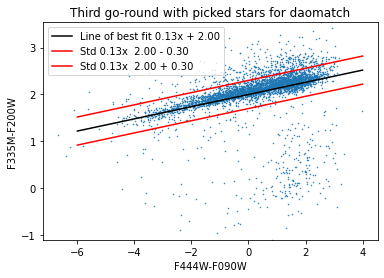

In [21]:
dao_pl  = dao[['f090w','f200w','f335m','f444w']].dropna(subset=['f090w','f200w','f335m','f444w'])
dao.dropna(subset=['f090w','f200w','f335m','f444w'],inplace=True)
col_x = dao_pl.f444w-dao_pl.f090w
col_y = dao_pl.f335m-dao_pl.f200w
# cut = -2
# col_x_fi = col_x.values[np.where(col_x.values>cut)[0]]
# col_y_fi = col_y.values[np.where(col_x.values>cut)[0]]

# lin_fit = np.polyfit(col_x_fi, col_y_fi, 1)
lin_fit = [0.13,2.]
std = 0.3 # np.sqrt(np.std(col_y_fi)**2+np.std(col_x_fi)**2)

xlim = np.arange(-6,5,1)
plt.plot(dao.f444w-dao.f090w, dao.f335m-dao.f200w,'.',markersize='1')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1], 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] - std, 'r',  label=f'Std {lin_fit[0]:4.2f}x  {lin_fit[1]:4.2f} - {std:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + std, 'r',  label=f'Std {lin_fit[0]:4.2f}x  {lin_fit[1]:4.2f} + {std:4.2f}')
# plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + np.sqrt(np.std(col_y_fi)**2+np.std(col_x_fi)**2), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} + {np.sqrt(np.std(col_y_fi)**2+np.std(col_x_fi)**2):4.2f}')
plt.xlabel('F444W-F090W')
plt.ylabel('F335M-F200W')
plt.title('Third go-round with picked stars for daomatch')
plt.ylim(min(col_y),max(col_y))
plt.legend(loc='upper left')
# plt.savefig('./Figures/DAOPHOT_Check_3_pi.png',dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


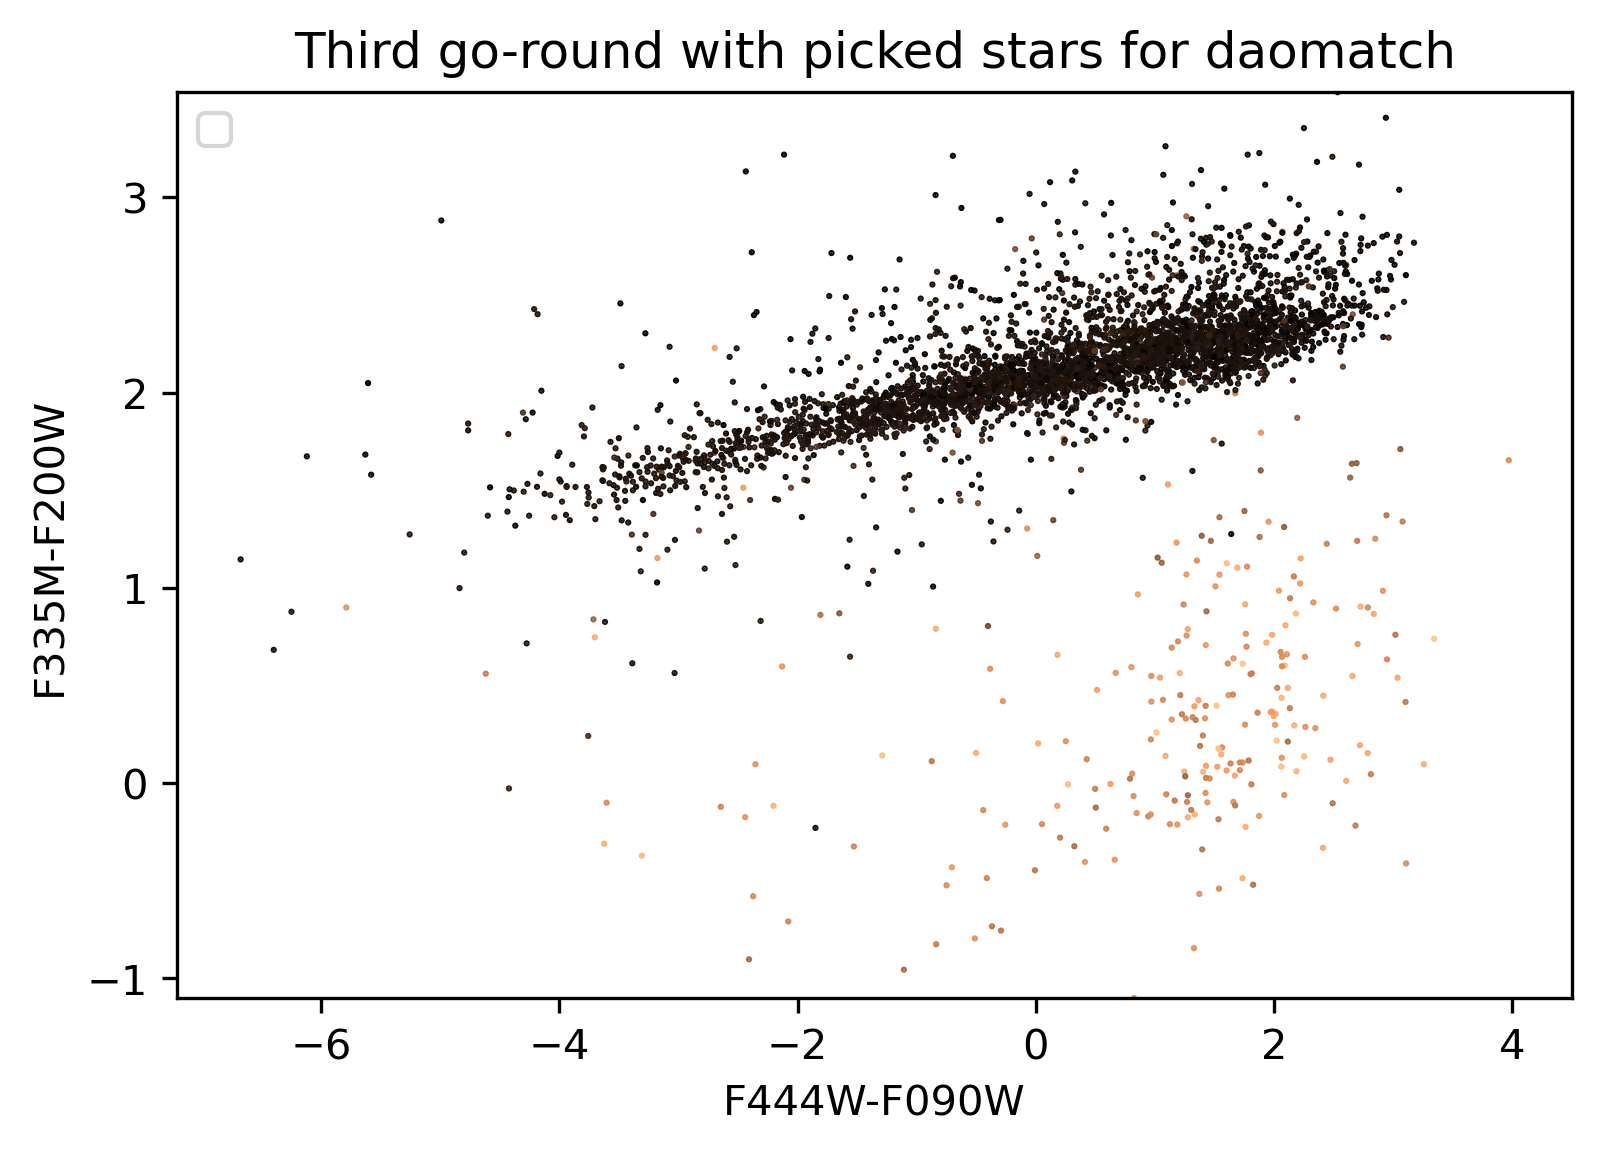

In [22]:
plt.subplots(dpi=300)
plt.scatter(dao.f444w-dao.f090w, dao.f335m-dao.f200w,c=dao.e_f200w.values,marker='.', s=1,cmap='copper')
plt.xlabel('F444W-F090W')
plt.ylabel('F335M-F200W')
plt.title('Third go-round with picked stars for daomatch')
plt.ylim(min(col_y),max(col_y))
plt.legend(loc='upper left')
# plt.colorbar()
# plt.savefig('./Figures/DAOPHOT_Check_3_pi.png

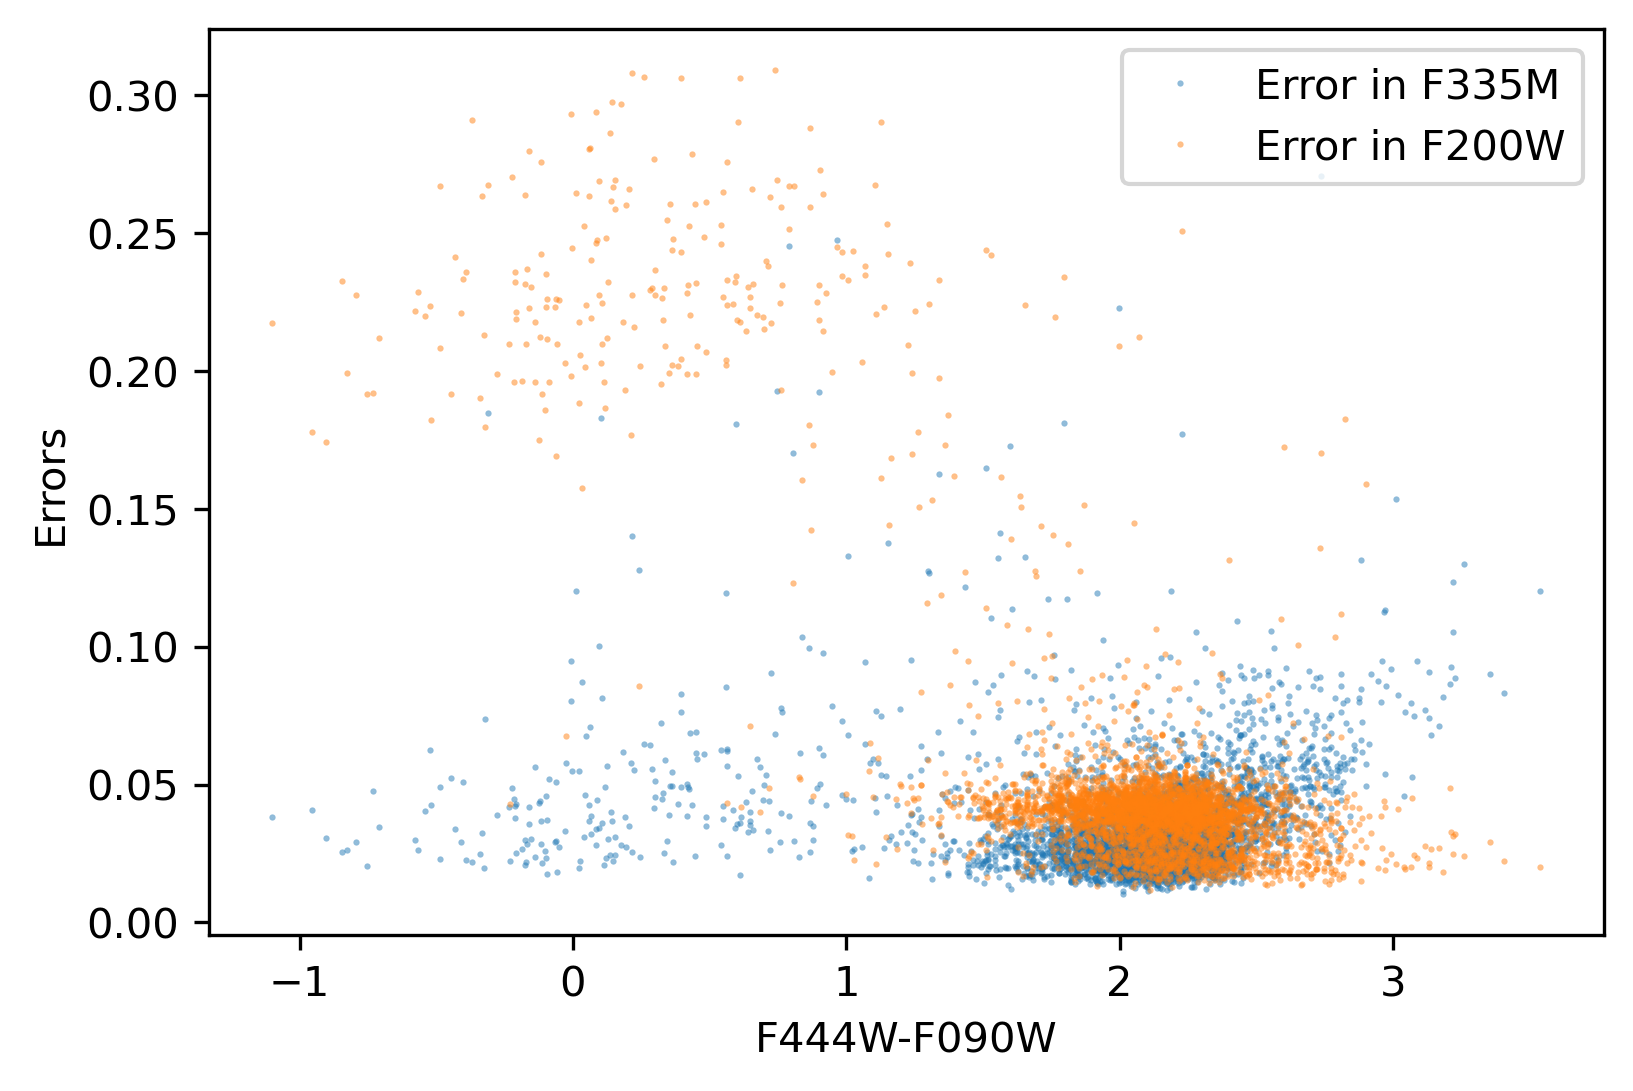

In [23]:
plt.subplots(dpi=300)
plt.plot(dao.f335m-dao.f200w, dao.e_f335m,'.',markersize='1', alpha = 0.5, label = 'Error in F335M')
plt.plot(dao.f335m-dao.f200w, dao.e_f200w,'.',markersize='1', alpha= 0.5,  label = 'Error in F200W')
plt.xlabel('F444W-F090W')
plt.ylabel('Errors')
plt.legend()


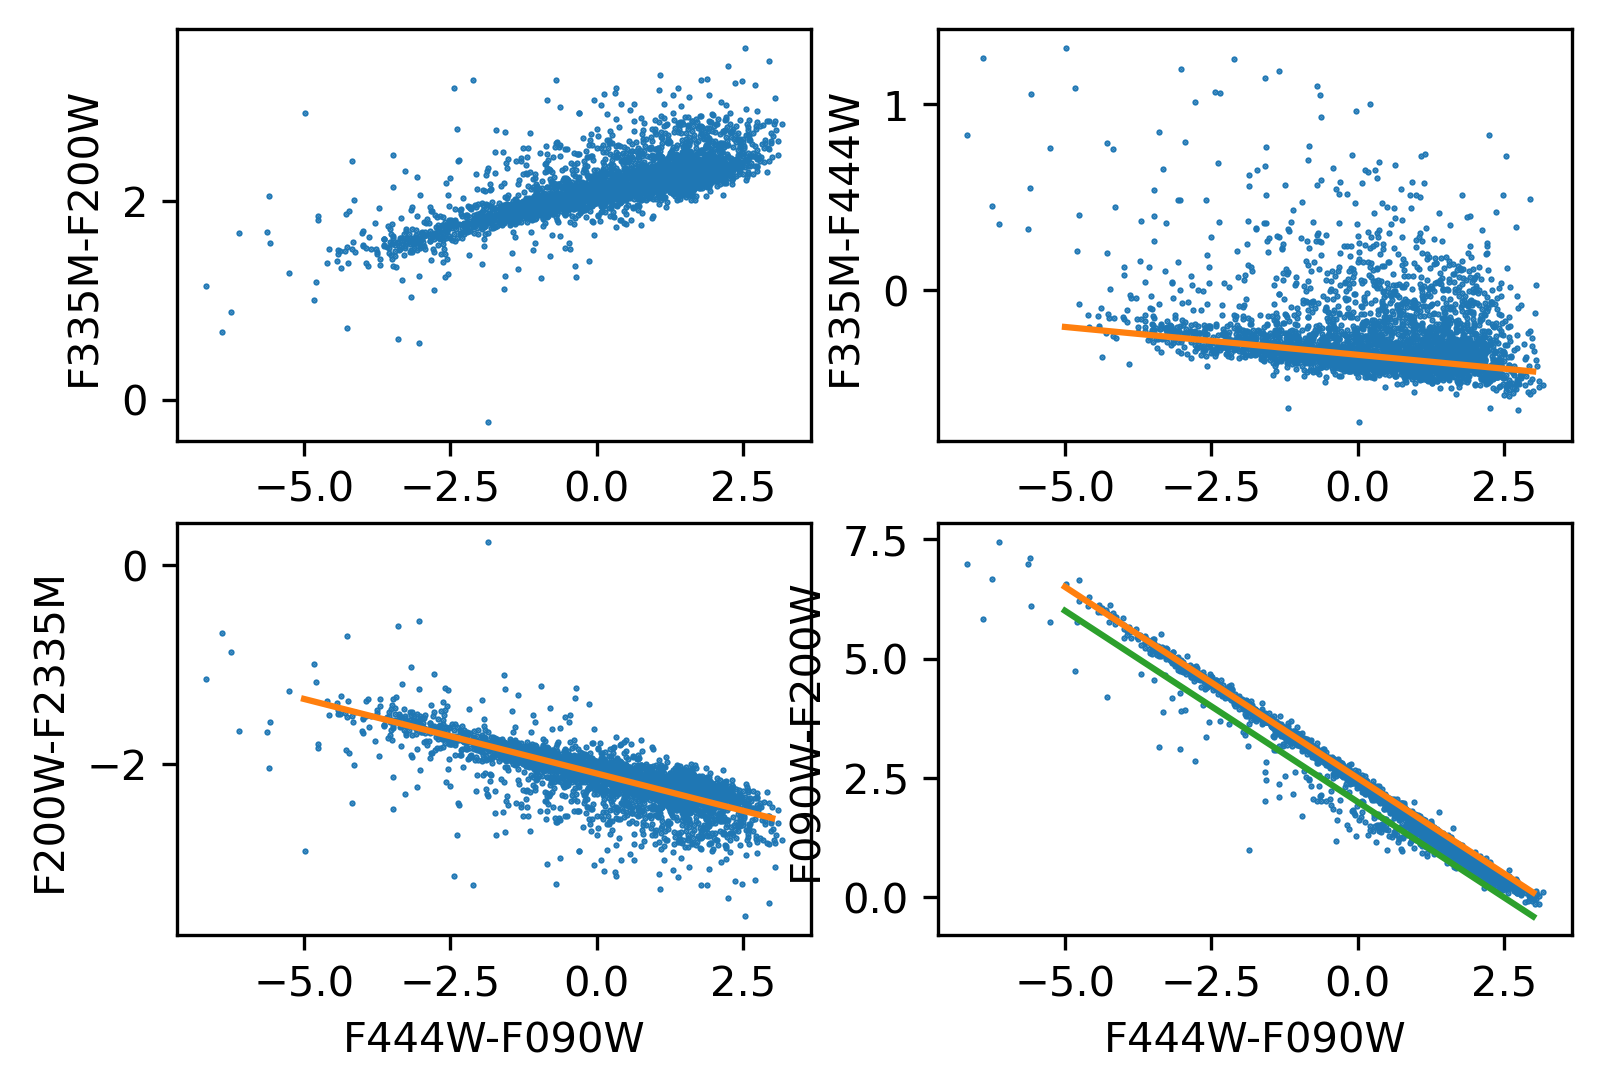

In [430]:
dao_temp = dao.copy()
dao = dao[dao.e_f200w<0.05]
dao = dao[dao.e_f444w<0.05]
fig, axs = plt.subplots(2,2,dpi=300)
axs[0][0].plot(dao.f444w-dao.f090w,dao.f335m-dao.f200w,'.',markersize=1)
axs[0][0].set_xlabel('F444W-F090W')
axs[0][0].set_ylabel('F335M-F200W')

axs[1][0].plot(dao.f444w-dao.f090w,dao.f200w-dao.f335m,'.',markersize=1)
axs[1][0].set_xlabel('F444W-F090W')
axs[1][0].set_ylabel('F200W-F2335M')
axs[1][0].plot(range(-5,4),-0.15*np.arange(-5,4)-2.1)
axs[1][1].plot(dao.f444w-dao.f090w,dao.f090w-dao.f200w,'.',markersize=1)
axs[1][1].set_xlabel('F444W-F090W')
axs[1][1].set_ylabel('F090W-F200W')
axs[1][1].plot(range(-5,4),-0.8*np.arange(-5,4)+2.5)
axs[1][1].plot(range(-5,4),-0.8*np.arange(-5,4)+2.)
axs[0][1].plot(dao.f444w-dao.f090w,dao.f335m-dao.f444w,'.',markersize=1)
axs[0][1].set_xlabel('F444W-F090W')
axs[0][1].set_ylabel('F335M-F444W')
axs[0][1].plot(range(-5,4),-0.03*np.arange(-5,4)-0.35)
dao = dao_temp.copy()

In [421]:
-0.03*np.arange(-6,5)-0.35

array([-0.17, -0.2 , -0.23, -0.26, -0.29, -0.32, -0.35, -0.38, -0.41,
       -0.44, -0.47])

In [444]:
def rms(filt1x, filt2x, filt1y, filt2y, df, linestart, lineend):
    df_points = np.array(df[filt1x]-df[filt2x],df[filt1y]-df[filt2y])
    d = []
    for i in range(0,len(df_points)):
        d_tmp = np.cross(lineend-linestart,df_points[i]-linestart)/np.linalg.norm(lineend-linestart)
        if abs(d_tmp) < 0.4:
            d.append(d_tmp)
    
    rms = np.sqrt(np.mean(np.array(d)**2))

    print("RMS from error propagation: ", np.mean(np.sqrt(df['e_'+filt1x].values**2+df['e_'+filt1y].values**2+df['e_'+filt2x].values**2+df['e_'+filt2y].values**2)))
    print("RMS = ", rms)
    return rms
    
rms('f444w','f090w','f090w','f200w',dao, np.array((-6,-0.17)),np.array((4,-0.47)))


RMS from error propagation:  0.1394738757821549
RMS =  0.22900675929718184


0.22900675929718184

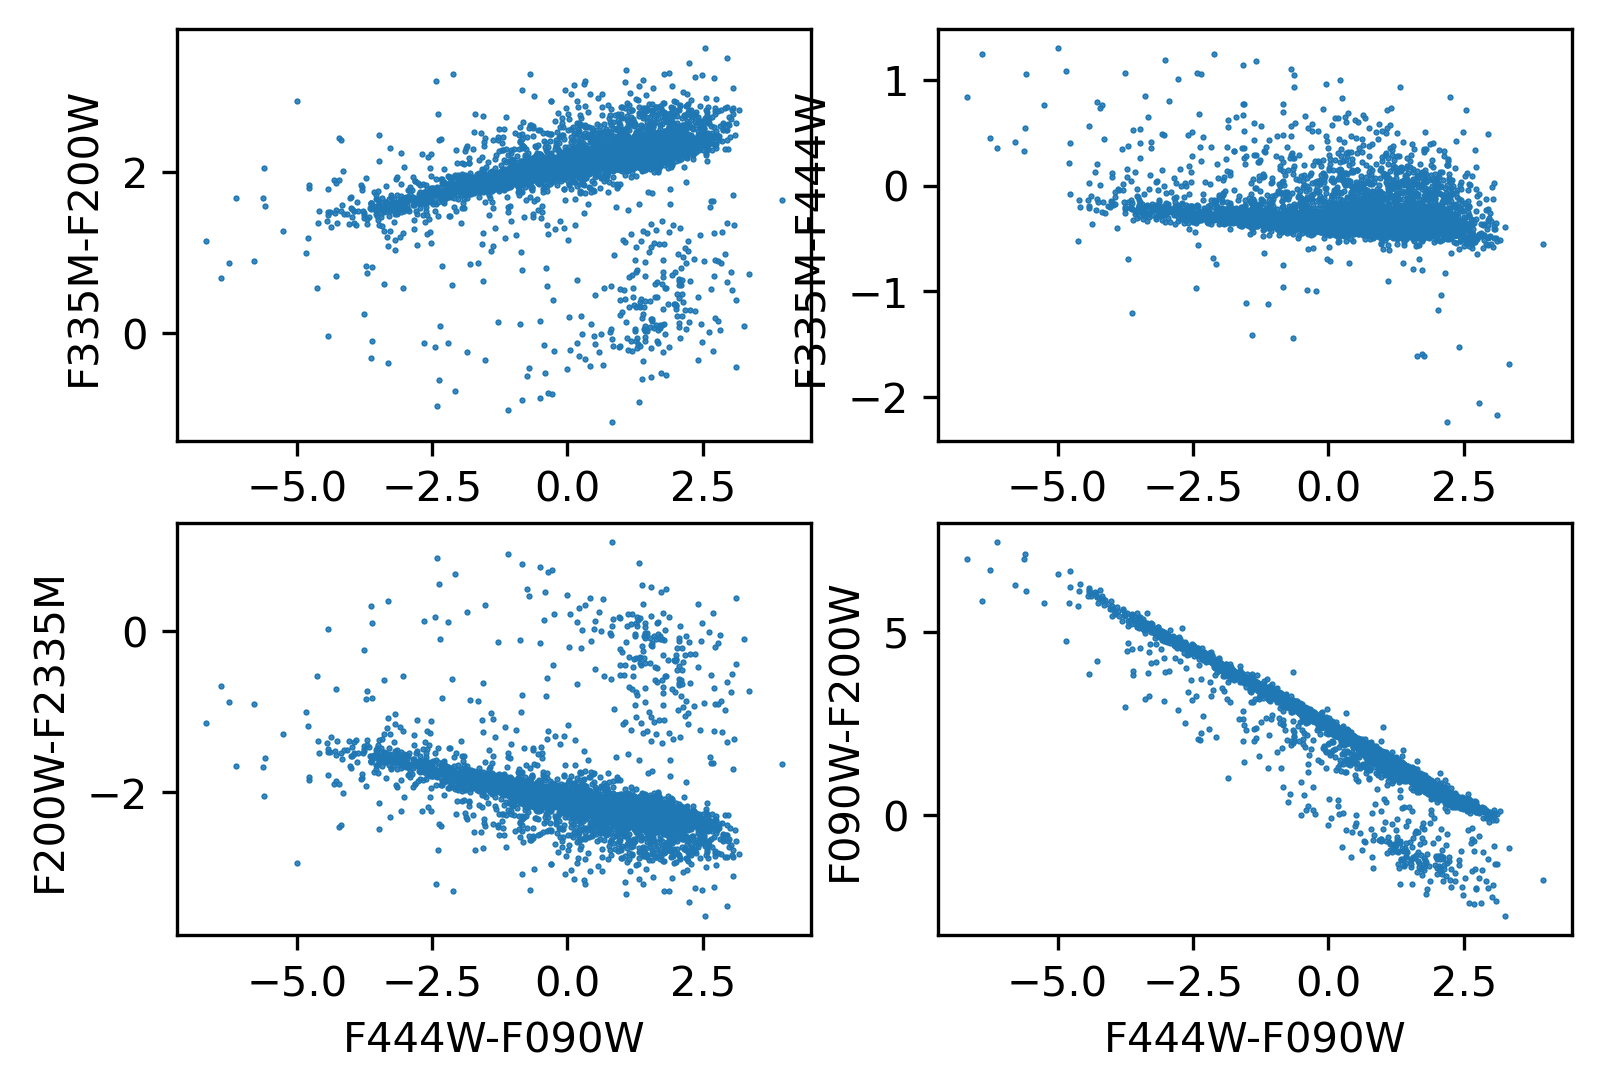

In [27]:
dao_temp = dao.copy()
# dao = dao[dao.e_f090w<0.05]
fig, axs = plt.subplots(2,2,dpi=300)
axs[0][0].plot(dao.f444w-dao.f090w,dao.f335m-dao.f200w,'.',markersize=1)
axs[0][0].set_xlabel('F444W-F090W')
axs[0][0].set_ylabel('F335M-F200W')

axs[1][0].plot(dao.f444w-dao.f090w,dao.f200w-dao.f335m,'.',markersize=1)
axs[1][0].set_xlabel('F444W-F090W')
axs[1][0].set_ylabel('F200W-F2335M')
axs[1][1].plot(dao.f444w-dao.f090w,dao.f090w-dao.f200w,'.',markersize=1)
axs[1][1].set_xlabel('F444W-F090W')
axs[1][1].set_ylabel('F090W-F200W')
axs[0][1].plot(dao.f444w-dao.f090w,dao.f335m-dao.f444w,'.',markersize=1)
axs[0][1].set_xlabel('F444W-F090W')
axs[0][1].set_ylabel('F335M-F444W')
dao = dao_temp.copy()


In [462]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
# cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
cols_lst = ['ID','x','y', 'Mag', 'err_1', 'err_2']

for filt in filters:
    hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.fits")
    # plt.hist(hdu[0].data.ravel(), bins=np.arange(1000,35500,1000), density=True, histtype='step', label=filt)
    w_jwst = wcs.WCS(hdu[0].header)
    dao_f = pd.read_csv("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.lst", header=None,delim_whitespace=True, skiprows=3, names=cols_lst)
    print(len(dao_f))
    SkyCoords_tmp_dao_f = w_jwst.pixel_to_world(dao_f.x,dao_f.y)
    dao_f['RA'] = SkyCoords_tmp_dao_f.ra
    dao_f['DEC'] = SkyCoords_tmp_dao_f.dec
    dao_f_tab = Table.from_pandas(dao_f,units={'x':'pix','y':'pix','RA':u.deg,'DEC':u.deg})
    dao_f_votab = from_table(dao_f_tab)
    
    writeto(dao_f_votab, "/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU_lst.xml")
# plt.xlim(100,10000)    
# plt.legend()
# plt.yscale('log')

800


NameError: name 'Table' is not defined

In [52]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
for filt in filters:
    hdu = fits.open(f"/Users/breannacrompvoets/DAOPHOT/daophot4/{filt}.fits")
    print(f"95th percentile in {filt} is ",np.percentile(np.sort(hdu[0].data.ravel()),99.9))
    print(max(hdu[0].data.ravel()))
plt.hist(hdu[0].data.ravel(), bins=np.arange(100,15000,1000), density=True, histtype='step')
plt.yscale('log')

95th percentile in f090w is  42.52574338533731
5192.3354


KeyboardInterrupt: 

# Check .coo output (roundness, sharpness, and sigma)

In [696]:
# filt = 'f335m'
# os.replace('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/Webb_PRF_Classification/temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.nei")


0


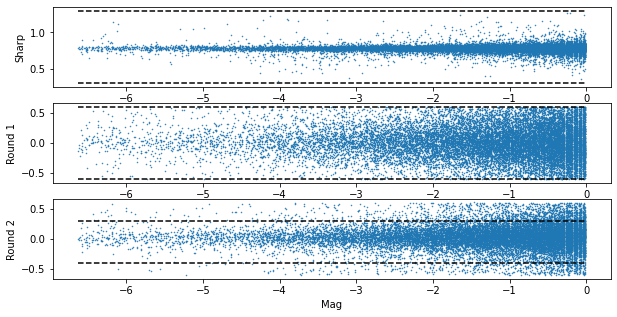

In [745]:
filt = 'f470n'

cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
print(len(np.where(dao_f.Sharp==9.999)[0]))

fig, axs = plt.subplots(3,1,figsize = (10,5))
axs[0].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[0].set_ylabel('Sharp')
axs[0].set_xlabel('Mag')
axs[0].hlines(1.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[0].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
# axs[0].set_ylim(-0.5,2)


axs[1].plot(dao_f.Mag,dao_f.Round1,'.',markersize=1)
axs[1].set_ylabel('Round 1')
axs[1].set_xlabel('Mag')
axs[1].hlines(0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1].hlines(-0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
# axs[1].set_ylim(-1,2)


axs[2].plot(dao_f.Mag,dao_f.Round2,'.',markersize=1)
axs[2].set_ylabel('Round 2')
axs[2].set_xlabel('Mag')
axs[2].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2].hlines(-0.4,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')

In [744]:
import os

with open(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.coo", "r") as input:
    with open("temp.txt", "w") as output:
        # iterate all lines from file
        for line in input:
            # if substring contain in a line then don't write it
            if ("-9.999" not in line.strip("\n")) and ("9.999" not in line.strip("\n")):
                output.write(line)

# replace file with original name
os.replace('temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.coo")

# Check .als/.alf output

In [751]:
filt = 'f090w'
print(filt)
cols = ['ID','x','y','Mag','Sigma','Modal_sky','Num_it','Chi','Sharp']
dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.als", header=None,delim_whitespace=True, skiprows=3, names=cols)
dao_f.head()

f090w


,ID,x,y,Mag,Sigma,Modal_sky,Num_it,Chi,Sharp
0,12002,8737.621,73.174,16.672,0.0755,174.93,4.0,1.123,0.186
1,1927,1321.304,90.882,16.449,0.0741,148.62,4.0,1.336,-0.288
2,10867,7915.074,93.392,17.762,0.1268,177.08,4.0,0.813,0.231
3,9468,6970.871,99.276,18.066,0.1096,176.75,4.0,0.524,0.537
4,14651,10700.160,104.600,16.411,0.0434,178.25,4.0,0.745,-0.173


f187n
2.0580596420386312
2.0580596420386312


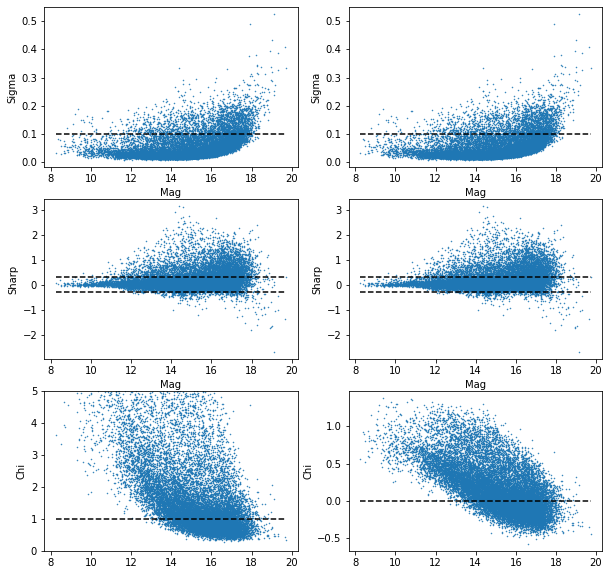

In [753]:
filt = 'f187n'
# filt = filters[q]
print(filt)
dao_f = pd.read_csv(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als", header=None,delim_whitespace=True, skiprows=3, names=cols)

fig, axs = plt.subplots(3,2,figsize = (10,10))

axs[0][0].plot(dao_f.Mag,dao_f.Sigma,'.',markersize=1)
axs[0][0].set_ylabel('Sigma')
axs[0][0].set_xlabel('Mag')
axs[0][0].hlines(0.1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][0].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[1][0].set_ylabel('Sharp')
axs[1][0].set_xlabel('Mag')
axs[1][0].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][0].hlines(-0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][0].plot(dao_f.Mag,dao_f.Chi,'.',markersize=1)
axs[2][0].hlines(1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][0].set_ylabel('Chi')
axs[2][0].set_ylim(0,5)
print(np.mean(dao_f.Chi))


# dao_f = dao_f[dao_f.Sigma<0.1]
# dao_f = dao_f[dao_f.Sharp<0.3]
# dao_f = dao_f[dao_f.Sharp>-0.0]

axs[0][1].plot(dao_f.Mag,dao_f.Sigma,'.',markersize=1)
axs[0][1].set_ylabel('Sigma')
axs[0][1].set_xlabel('Mag')
axs[0][1].hlines(0.1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][1].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[1][1].set_ylabel('Sharp')
axs[1][1].set_xlabel('Mag')
axs[1][1].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][1].hlines(-0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][1].plot(dao_f.Mag,np.log10(dao_f.Chi),'.',markersize=1)
axs[2][1].hlines(0,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][1].set_ylabel('Chi')
print(np.mean(dao_f.Chi))
q +=1
# plt.savefig('./Figures/run_1_allstar_f470n.png',dpi=300)

In [748]:

with open(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als", "r") as input:
    # print(input.readlines())
    with open("temp.txt", "w") as output:
        # iterate all lines from file
        for l, line in enumerate(input):
            # if substring contain in a line then don't write it
            if l < 3:
                output.write(line)
            else:
                if abs(dao_f.Sharp.iloc[l-3]) < 0.3:
                    if abs(dao_f.Sigma.iloc[l-3]) < 0.1:
                        output.write(line)
                        

# replace file with original name
os.replace('temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als")

In [668]:
def changes_from_chi(dao_f):
    # cols = ['ID','x','y','Mag','Sigma','Modal_sky','Num_it','Chi','Sharp']
    # dao_f = pd.read_csv(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als", header=None,delim_whitespace=True, skiprows=3, names=cols)

    read = 1-np.mean(dao_f[dao_f.Mag<np.mean(dao_f.Mag)].Chi)
    gain = (1-np.mean(dao_f[dao_f.Mag>np.mean(dao_f.Mag)].Chi))**2

    return f"Read noise should be: {read} and gain should be {gain}."

In [750]:
changes_from_chi(dao_f)

'Read noise should be: -0.6147859140605145 and gain should be 0.06822084245849004.'

# Find good threshold

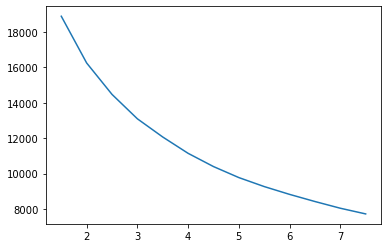

In [200]:
thresh = np.arange(1.5,8,0.5)
numstars = [18885,16246,14473,13096,12068,11147,10400,9778,9271,8830,8427,8048,7727]#[11392,9426,8107,7146,6442,5845,5377,4989,4694,4345,4094,3908]#[7183, 6180, 5487, 4993, 4593, 4278, 4038, 3849, 3650, 3462, 3324, 3179,3054, 2943]
plt.plot(thresh,numstars)

# Change FITS files to short ints in ADU

In [734]:
filt

'f470n'

In [738]:
for filt in [filt]:#filters:
    hdu = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/RESULTS_MJYSR/{filt}.fits')
    data = hdu[0].data
    
# Convert fits files to units of DN from Mjy/sr
    print(hdu[0].header['PHOTMJSR'])
    data = np.short(data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']*31.89)) # 31.89 is an empirical constant derived by setting the previous saturation limit found in the image to 32767, or the maximum of a shortint
    data[np.where(data<10)] = 32767 # Set any pixels with values low enough to be bad to the saturated pixel amount so that they are not counted in daophot
    hdr = hdu[0].header
    hdr['BUNIT'] = 'ADU'

# Save to new fits files
    fits.writeto(f'/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.fits', data, hdr,overwrite=True)

13.87049961090088


In [739]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7047                                                  
NAXIS2  =                 4167                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.37547690324 / [d] exposure start time in MJD                 
MJD-AVG =    59733.48862297418 / [d] exposure mid-point in MJD                  
MJD-END =    59733.60158211806 / [d] exposure end time in MJD                   
TDB-BEG =    59733.38083258623 / [d] TDB time of exposure start in MJD          
TDB-MID =    59733.49397739384 / [d] TDB time of exposure mid-point in MJD      
TDB-END =    59733.60693526757 / [d] TDB time of exposure end in MJD            
XPOSURE =             11595.

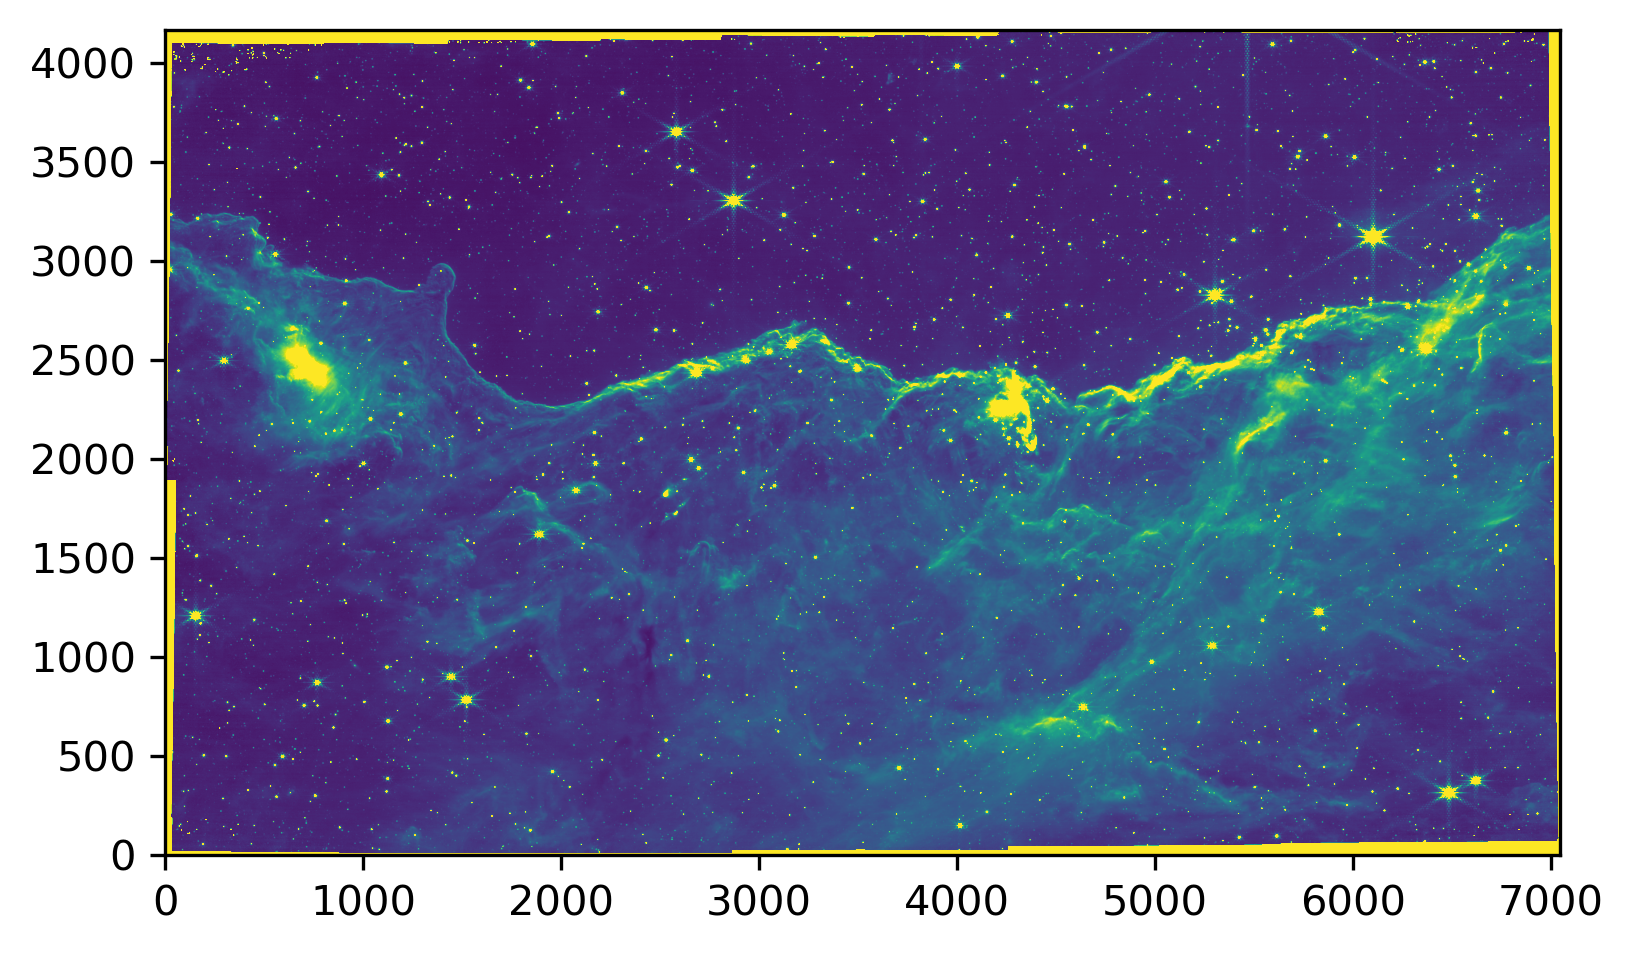

In [742]:
# filt = 'f090w'
data = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.fits')[0].data
plt.subplots(dpi=300)
plt.imshow(data,vmax=400,origin='lower')
plt.plot(dao_f.iloc[np.where(dao_f.Sharp==9.999)[0]].x,dao_f.iloc[np.where(dao_f.Sharp==9.999)[0]].y,'.',markersize=0.5)

In [167]:
print(len(np.where(dao_f.Sharp==9.999)[0]))
print(len(dao_f.Sharp))

2208
236658


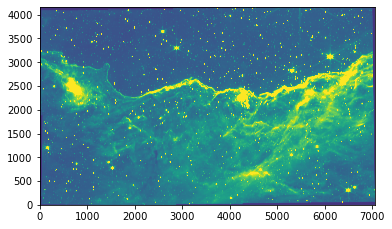

In [102]:
plt.imshow(hdu[0].data,vmax=10,origin='lower')

In [113]:
data

array([[32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       ...,
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.]],
      dtype=float32)

In [ ]:
# def proc_coo(filt):
#     cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
#     dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
#     dao_f

9237.766


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_5189/3277491043.py:7: RuntimeWarning: invalid value encountered in power
  data = (data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']))**(1/2.9)


(100.0, 1000.0)

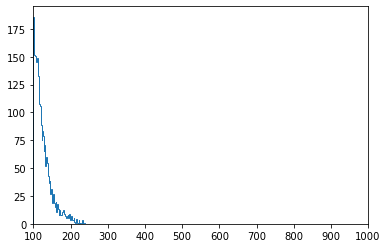

In [729]:

hdu = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/RESULTS_MJYSR/{filt}.fits')
data = hdu[0].data

# Convert fits files to units of DN from Mjy/sr
# print(hdu[0].header['PHOTMJSR'])
print(max(data.ravel()))
data = (data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']))**(1/2.9)
plt.hist(data.ravel(),histtype='step',bins=range(100,1000,2))
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(100,1000)
# plt.vlines(32767,color='k',ymin=0,ymax=10000)
# plt.vlines(40,ymin=0,ymax=1000color='k',)
# plt.vlines(50,ymin=0,ymax=1000color='k',)
# plt.vlines(60,ymin=0,ymax=1000color='k',)

In [733]:
100**2.9/19

33208.28128843121

In [247]:
5192.3354*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR'])

45293757.720822595

# Find Zero Points

Plot apparent magnitude versus 1/aperature radius. As aperatures get really big, magnitude should reach a steady point.

In [349]:
head = ['ID', 'x', 'y', 'mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']
ap_test = pd.read_csv("~/DAOPHOT/NGC3324/RESULTS_MJYSR/f090w_zp.ap", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
# rads = [1/r for r in [1.5,1.8,2.2,2.7,3.3,4.0,4.8,5.7,6.7,7.8,9.0,10.3]]
# rads = [1/r for r in [1.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5]]
rads = [r for r in [1,3,6,9,12,15,18,21,24,27,30,35]]
ap_test

,ID,x,y,mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,mag_9,mag_10,mag_11,mag_12
0,3440.0,11262.080,5450.034,15.124,14.236,14.044,13.968,13.921,13.900,13.889,13.884,13.885,13.889,13.892,13.895
2,2030.0,6905.212,4437.768,15.088,14.479,14.252,14.160,14.104,14.077,14.064,14.058,14.058,14.063,14.066,14.069
4,2305.0,7751.339,5007.741,14.975,14.366,14.170,14.087,14.037,14.014,14.003,13.997,13.998,14.002,14.005,14.007
6,3642.0,12036.340,517.507,14.974,14.349,14.106,14.014,13.957,13.932,13.919,13.913,13.914,13.919,13.922,13.925
8,3649.0,12084.410,867.638,15.047,14.404,14.176,14.089,14.033,14.009,13.996,13.990,13.991,13.995,13.998,14.001
10,3462.0,11360.790,5314.730,15.094,14.400,14.183,14.098,14.046,14.021,14.010,14.004,14.006,14.011,14.015,14.018
12,2924.0,9527.252,5326.947,15.088,14.430,14.226,14.146,14.096,14.073,14.061,14.055,14.056,14.060,14.063,14.065
14,2239.0,7576.185,8346.959,15.163,14.477,14.295,14.224,14.178,14.158,14.149,14.144,14.145,14.148,14.150,14.152
16,2661.0,8806.050,1007.601,15.137,14.442,14.222,14.138,14.086,14.062,14.050,14.044,14.044,14.048,14.051,14.054
18,1911.0,6450.166,6810.082,15.237,14.491,14.265,14.171,14.113,14.088,14.075,14.068,14.068,14.073,14.076,14.079


16


(16.5, 13.5)

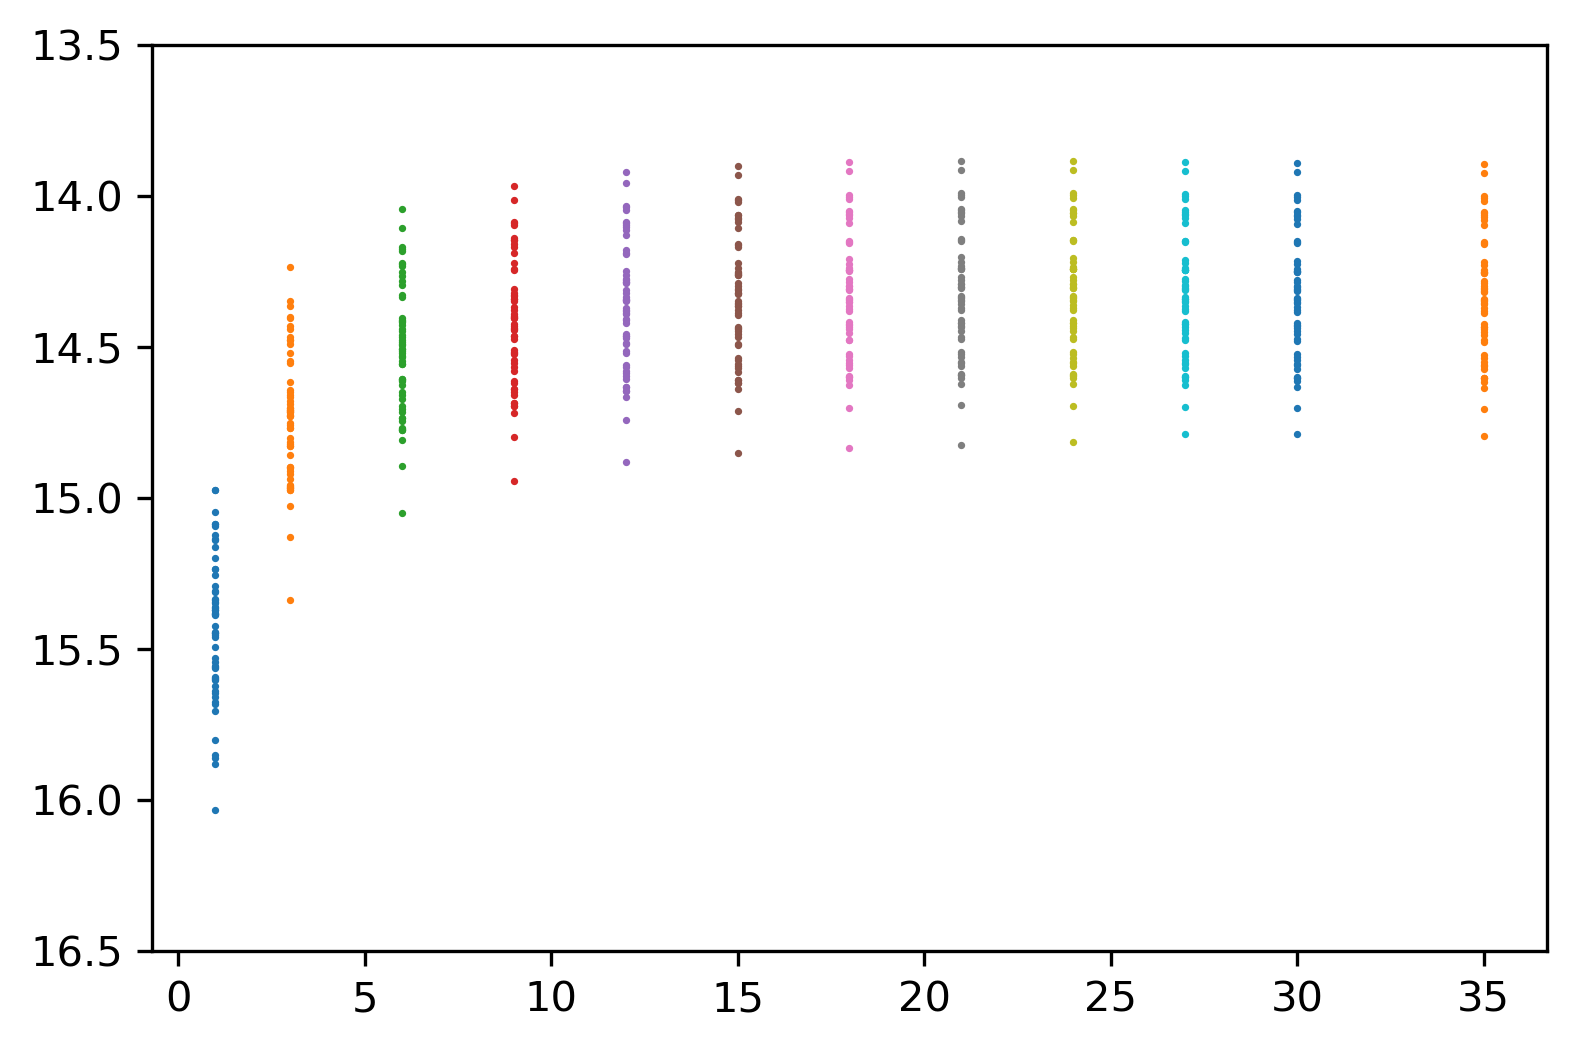

In [389]:
i+=1
print(i)
plt.subplots(dpi=300)
plt.plot([rads]*len(ap_test), ap_test[['mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']].values,'.',markersize=1.5)
# plt.hlines(14.1,xmin=0,xmax=35,alpha=0.5,color='k')
plt.ylim(16.5,13.5)

In [373]:
i = 0